### Experiment: "Publishen" der Kühlschranktemperatur


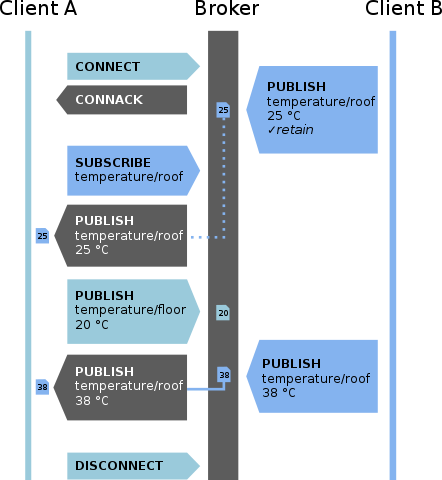

Unter Python nutzen wir das Paket [paho](https://pypi.org/project/paho-mqtt/) um auf den Demoserver zuzugreifen.

In [1]:
# Import
import paho.mqtt.client as mqtt

In [2]:
# Instanziieren eines paho-mqtt-clients. Unter dem Namen meldet sich der Client beim Server an. Achtung: Muss zumindest auf einer IP eindeutig sein
client = mqtt.Client('my_paho_client_1')

In [3]:
# Verbinden mit dem Demoserver
client.connect('test.mosquitto.org')

0

In [7]:
# Publishen der aktuellen Temperatur als Integer-Zahl
client.publish('157e/Küche/Kühlschrank/Temperatur', 0)

Wir nutzen auf dem PC den MQTT-Explorer, um den Wert zu beobachten. 

### Dynamisches Publishen eines veränderlichen floatingpoint-Werts

Um Bewegung ins Spiel zu bringen, lassen wir die Temperatur langsam verändern. In der Praxis wäre die Datenquelle ein IoT-Device. Wir ersetzen es hier durch einen separaten Prozess (thread), der periodisch Datenwerte published

In [8]:
import time
import threading

In [10]:
# Erzeugen eines Threads, der die Temperatur im 5-Sekundentakt postet
class TempSensor(threading.Thread):
    def run(self):
        temp = -7
        for i in range(1000):
            temp += 0.02
            client.publish('157e/Küche/Kühlschrank/Temperatur', temp)
            time.sleep(5)      

In [12]:
tempsensor = TempSensor()
# Nach dem Start läuft der Thread, bis er nach 1000 loops endet oder bis zum Ende des Notebooks
tempsensor.start()

### Publishen eines Array

Hier wird `str()` benutzt, um einen string zu erzeugen. Die Codierung übernimmt der mqtt-Client

In [8]:
client.publish('Küche/Kühlschrank/Einrichtung', str(['Flaschenregal', 'Tupperdose']))

### Publishen eines Dictionary

Die Übertragung in string geschieht hier zweckmäßig mit `dumps()` aus dem Package `json`

In [9]:
import json
specs = {'Hersteller': 'Liebherr',
         'Type': '23W45',
         'gekauft': '19.04.2021'}
client.publish('Küche/Kühlschrank/Specs', json.dumps(specs))

In [10]:
client.publish('Küche/Kühlschrank/Einrichtung', json.dumps(['Flaschenregal', 'Tupperdose', 'Wasserspender']))

## Publishen mit callback

an einem weiteren virtuellen Sensorsystem wird das Prinzip des "callback" erklärt, dass wir beim Subscriber intensiv nutzen werden

In [11]:

# Nach 100 Durchläufen soll eine Meldung ausgegeben werden
import numpy.random
rnd = numpy.random.default_rng()

In [12]:
rnd.normal()

1.6257434307764025

In [13]:
def solar_panel_log(message):
    print(message)

In [18]:
# Erzeugen eines Threads, der einige simulierte Daten eines Solarpanels erfasst und postet
class SolarSensor(threading.Thread):
    def run(self):
        energy = 0
        for i in range(1000):
            if i % 100 == 0:
                solar_panel_log(f'Sensor living. loopcount={i}')
            power = 230 + rnd.normal()*0.2
            temp = 8 + rnd.normal()*0.1
            energy+= power*0.5
            client.publish('Dach/Solarpanel/Leistung', power)
            client.publish('Dach/Solarpanel/Energie', energy)
            client.publish('Dach/Solarpanel/Temperatur', temp)
            time.sleep(0.5)      

In [19]:
solarsensor = SolarSensor()
solarsensor.start()

Sensor living. loopcount=0
Sensor living. loopcount=100
Sensor living. loopcount=100
Sensor living. loopcount=100
Sensor living. loopcount=200
Sensor living. loopcount=200
Sensor living. loopcount=200
Sensor living. loopcount=300
Sensor living. loopcount=300
Sensor living. loopcount=300
Sensor living. loopcount=400
Sensor living. loopcount=400
Sensor living. loopcount=400
Sensor living. loopcount=500
Sensor living. loopcount=500
Sensor living. loopcount=500
Sensor living. loopcount=600
Sensor living. loopcount=600
Sensor living. loopcount=600
Sensor living. loopcount=700
Sensor living. loopcount=700
Sensor living. loopcount=700


In [16]:
solarsensor._stop()

AssertionError: 